#Importer les librairies

In [1]:
# Importation des bibliothèues nécessaires
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

#Analyse Exploratoire

In [2]:
# 1. Charger les données
data = pd.read_csv('/content/tweets_suspect.csv')

In [3]:
data

,message,label
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1
1,is upset that he can't update his Facebook by ...,1
2,@Kenichan I dived many times for the ball. Man...,1
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",1
...,...,...
59995,"Really wants to go and see 17 again, because Z...",1
59996,@krissa22 Thank you!,1
59997,dreaming of you,1
59998,@TheEllenShow I saw a clip online! good show!,1


In [4]:
data["label"].value_counts()

,count
label,
1,53855
0,6145


In [5]:
df=data

#Impression des tweet qui commence par @, dieze et des sites

In [6]:
# Fonction pour extraire les mots qui commencent par "#"
def extract_mentions(phrase):
    return re.findall(r'#\w+', phrase)

df['mentions_dieze'] = df['message'].apply(extract_mentions)
all_mentions = df['mentions_dieze'].sum()
print(all_mentions)

['#itm', '#therapyfail', '#fb', '#TTSC', '#24', '#gayforpeavy', '#FML', '#3', '#camerafail', '#fb', '#travian', '#wow', '#art', '#fail', '#KrispyKreme', '#fb', '#24', '#the', '#twitter', '#fail', '#CNN', '#1', '#Kulula', '#surface', '#c25k', '#drupal', '#epicfail', '#rails', '#mhbigcatch', '#stuckrecord', '#twitteriffic', '#startrek', '#earthquake', '#php', '#poken', '#error', '#tracy', '#fb', '#dwsr', '#Italy', '#Earthquake', '#fantasysurfer', '#titsuptuesday', '#N85', '#heyxboxlive', '#House', '#babypunch', '#cob', '#ticket', '#fb', '#fb', '#terremoto', '#earthquake', '#italy', '#fail', '#itm', '#AutomationAtaCost', '#gsoc', '#rockbox', '#niceweather', '#Berlin', '#goodlife', '#Ambients', '#theinbetweeners', '#Twilight', '#Summers', '#mmuk09', '#i36', '#spotify', '#42', '#fb', '#pman', '#spbpuk', '#dreams', '#dreams', '#dwsr', '#fb', '#wolframalpha', '#search', '#semantic', '#Virgin', '#liquor', '#Easter', '#NAME', '#liquor', '#Easter', '#WCH', '#tired', '#barcodes', '#nickdarcy', '#

In [7]:
# Fonction pour extraire les mots qui commencent par "@"
def extract_mentions(phrase):
    return re.findall(r'@\w+', phrase)

df['mentions'] = df['message'].apply(extract_mentions)
all_mentions = df['mentions'].sum()
print(all_mentions)

['@switchfoot', '@Kenichan', '@nationwideclass', '@Kwesidei', '@LOLTrish', '@Tatiana_K', '@twittera', '@caregiving', '@octolinz16', '@smarrison', '@iamjazzyfizzle', '@iamlilnicki', '@LettyA', '@FakerPattyPattz', '@alydesigns', '@angry_barista', '@alielayus', '@julieebaby', '@HumpNinja', '@cocomix04', '@MissXu', '@fleurylis', '@JonathanRKnight', '@Viennah', '@jeancjumbe', '@tea', '@localtweeps', '@andywana', '@BatManYNG', '@Starrbby', '@katortiz', '@Lt_Algonquin', '@jdarter', '@ninjen', '@ashleyac', '@statravelAU', '@markhardy1974', '@msdrama', '@januarycrimson', '@Hollywoodheat', '@makeherfamous', '@stark', '@mangaaa', '@kpreyes', '@mangaaa', '@Henkuyinepu', '@marykatherine_q', '@jacobsummers', '@Alliana07', '@salancaster', '@mercedesashley', '@HibaNick', '@eRRe_sC', '@allyheman', '@grum', '@thecoolestout', '@chelserlynn', '@Knights_', '@BridgetsBeaches', '@JonathanRKnight', '@ozesteph1992', '@mrsaintnick', '@twista202', '@rumblepurr', '@onemoreproject', '@jonathanchard', '@RyanSeacres

In [8]:

# Fonction pour extraire les URLs
def extract_urls(phrase):
    # Expression régulière pour capturer les URLs
    url_pattern = r'(https?://[^\s]+|www\.[^\s]+)'
    return re.findall(url_pattern, phrase)

df['urls'] = df['message'].apply(extract_urls)
all_urls = df['urls'].sum()

print(all_urls)


['http://twitpic.com/2y1zl', 'http://is.gd/fNge', 'http://tinyurl.com/dcuc33', 'www.diigo.com/~tautao', 'http://twitpic.com/2y2es', 'http://apps.facebook.com/dogbook/profile/view/5248435', 'http://ff.im/1XTTi', 'http://www.erika-obscura.blogspot.com', 'http://twitpic.com/2y2wr', 'http://tinyurl.com/cw2l9t', 'http://tinyurl.com/ceprvs', 'http://twitpic.com/2y2yi', 'https://www.mycomicshop.com/search?TID=395031', 'http://tinyurl.com/cec5ka', 'http://twitpic.com/2y34e', 'http://tinyurl.com/dc2htx', 'http://twitpic.com/2y36e', 'http://is.gd/r8Zf,', 'http://is.gd/r8Zy,', 'http://is.gd/r8ZG', 'http://tinyurl.com/c4ooho', 'http://twitpic.com/2y3cf', 'http://tinyurl.com/c8bvqh', 'http://tinyurl.com/cxe8w7', 'http://fanclub.backstreetboys.com/chat.php', 'http://twitpic.com/2y1pe', 'http://twitpic.com/2y3jp', 'http://loopt.us/KoqAbg', 'http://twitpic.com/2y3ty', 'www...', 'http://twitpic.com/2y3y0', 'http://plurk.com/p/mzxbg', 'http://plurk.com/p/mzxcs', 'http://loopt.us/ORPL3A', 'http://www.tv.

In [9]:
df

,message,label,mentions_dieze,mentions,urls
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1,[],[@switchfoot],[http://twitpic.com/2y1zl]
1,is upset that he can't update his Facebook by ...,1,[],[],[]
2,@Kenichan I dived many times for the ball. Man...,1,[],[@Kenichan],[]
3,my whole body feels itchy and like its on fire,0,[],[],[]
4,"@nationwideclass no, it's not behaving at all....",1,[],[@nationwideclass],[]
...,...,...,...,...,...
59995,"Really wants to go and see 17 again, because Z...",1,[],[],[]
59996,@krissa22 Thank you!,1,[],[@krissa22],[]
59997,dreaming of you,1,[],[],[]
59998,@TheEllenShow I saw a clip online! good show!,1,[],[@TheEllenShow],[]


#Supression des mots commencant par @ , dieze  et les sites

In [10]:
import re

# Fonction pour supprimer les mots qui commencent par "@" et les sites web
def remove_mentions_urls_hashtags(phrase):
    # Expression régulière pour les mots commençant par "@"
    mention_pattern = r'@\w+'
    # Expression régulière pour les mots commençant par "#"
    hashtag_pattern = r'#\w+'
    # Expression régulière pour les URLs
    url_pattern = r'(https?://[^\s]+|www\.[^\s]+)'
    clean_phrase = re.sub(f'{mention_pattern}|{hashtag_pattern}|{url_pattern}', '', phrase)
    return ' '.join(clean_phrase.split())


df['clean_phrases'] = df['message'].apply(remove_mentions_urls_hashtags)

In [11]:
df

,message,label,mentions_dieze,mentions,urls,clean_phrases
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1,[],[@switchfoot],[http://twitpic.com/2y1zl],"- Awww, that's a bummer. You shoulda got David..."
1,is upset that he can't update his Facebook by ...,1,[],[],[],is upset that he can't update his Facebook by ...
2,@Kenichan I dived many times for the ball. Man...,1,[],[@Kenichan],[],I dived many times for the ball. Managed to sa...
3,my whole body feels itchy and like its on fire,0,[],[],[],my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",1,[],[@nationwideclass],[],"no, it's not behaving at all. i'm mad. why am ..."
...,...,...,...,...,...,...
59995,"Really wants to go and see 17 again, because Z...",1,[],[],[],"Really wants to go and see 17 again, because Z..."
59996,@krissa22 Thank you!,1,[],[@krissa22],[],Thank you!
59997,dreaming of you,1,[],[],[],dreaming of you
59998,@TheEllenShow I saw a clip online! good show!,1,[],[@TheEllenShow],[],I saw a clip online! good show!


In [12]:
data=df

#Suprimmer les ponctuation

In [13]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
def Remove_Punctuation(text):
    result = "".join([ch for ch in text if ch not in string.punctuation])
    return result

data['Content_clean'] = data['clean_phrases'].apply(lambda x: Remove_Punctuation(x))

data.head()

,message,label,mentions_dieze,mentions,urls,clean_phrases,Content_clean
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1,[],[@switchfoot],[http://twitpic.com/2y1zl],"- Awww, that's a bummer. You shoulda got David...",Awww thats a bummer You shoulda got David Car...
1,is upset that he can't update his Facebook by ...,1,[],[],[],is upset that he can't update his Facebook by ...,is upset that he cant update his Facebook by t...
2,@Kenichan I dived many times for the ball. Man...,1,[],[@Kenichan],[],I dived many times for the ball. Managed to sa...,I dived many times for the ball Managed to sav...
3,my whole body feels itchy and like its on fire,0,[],[],[],my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",1,[],[@nationwideclass],[],"no, it's not behaving at all. i'm mad. why am ...",no its not behaving at all im mad why am i her...


#Tokenization + lower

In [15]:
import re
def tokenizer(text):
    words = re.split('\W+', text)
    return words

data['Content_tokenized'] = data['Content_clean'].apply(lambda x: tokenizer(x.lower()))

data.head()

,message,label,mentions_dieze,mentions,urls,clean_phrases,Content_clean,Content_tokenized
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1,[],[@switchfoot],[http://twitpic.com/2y1zl],"- Awww, that's a bummer. You shoulda got David...",Awww thats a bummer You shoulda got David Car...,"[, awww, thats, a, bummer, you, shoulda, got, ..."
1,is upset that he can't update his Facebook by ...,1,[],[],[],is upset that he can't update his Facebook by ...,is upset that he cant update his Facebook by t...,"[is, upset, that, he, cant, update, his, faceb..."
2,@Kenichan I dived many times for the ball. Man...,1,[],[@Kenichan],[],I dived many times for the ball. Managed to sa...,I dived many times for the ball Managed to sav...,"[i, dived, many, times, for, the, ball, manage..."
3,my whole body feels itchy and like its on fire,0,[],[],[],my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its..."
4,"@nationwideclass no, it's not behaving at all....",1,[],[@nationwideclass],[],"no, it's not behaving at all. i'm mad. why am ...",no its not behaving at all im mad why am i her...,"[no, its, not, behaving, at, all, im, mad, why..."


#Supprimer les stopword

In [16]:
import nltk
from nltk.corpus import stopwords

# Télécharger les stopwords
nltk.download('stopwords')

# Charger les stopwords en anglais
en_stopwords = set(stopwords.words('english'))
print(en_stopwords)

{'her', 'itself', 'himself', "weren't", 'was', "mustn't", 'his', 're', 'and', 'have', "you're", 'during', 'did', 'mightn', 'hers', 'were', 'further', 'who', 'all', 'has', 'these', 'how', 'what', 'do', 'before', 'where', 'for', 'such', 'them', "isn't", 'whom', "you'd", 'when', 'does', 'not', 'by', 'no', 'hasn', "hasn't", "she's", 'a', 'will', 'm', 'hadn', 'haven', 'just', 'with', "didn't", 'ours', 'myself', 'my', 'theirs', 'than', 'ain', 'we', 'didn', 'under', 'she', 'other', 'needn', 'nor', 'it', 'their', 'are', 'most', 'the', 'yourselves', 'into', 'wouldn', 'shouldn', 'on', 'or', "don't", 'but', 'too', 've', 'from', 'which', 'can', 'now', 'in', 's', 'very', 'herself', 'then', 'doing', "couldn't", 'until', 'yours', "shouldn't", 'him', 'won', 'against', "aren't", 'this', 'out', 'because', 'don', 'once', 'our', 'y', 'that', 'above', 'down', 'they', 'there', 'so', 'll', "it's", 'couldn', 'any', 'after', 'off', "haven't", 'of', 'its', 'yourself', 'at', 'while', 'over', 'each', 'up', "you'v

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
def Remove_Stopwords(content_list):
    result = [word for word in content_list if word not in en_stopwords]
    return result

data['Content_NO_Stopwords'] = data['Content_tokenized'].apply(lambda x: Remove_Stopwords(x))

data.head()

,message,label,mentions_dieze,mentions,urls,clean_phrases,Content_clean,Content_tokenized,Content_NO_Stopwords
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1,[],[@switchfoot],[http://twitpic.com/2y1zl],"- Awww, that's a bummer. You shoulda got David...",Awww thats a bummer You shoulda got David Car...,"[, awww, thats, a, bummer, you, shoulda, got, ...","[, awww, thats, bummer, shoulda, got, david, c..."
1,is upset that he can't update his Facebook by ...,1,[],[],[],is upset that he can't update his Facebook by ...,is upset that he cant update his Facebook by t...,"[is, upset, that, he, cant, update, his, faceb...","[upset, cant, update, facebook, texting, might..."
2,@Kenichan I dived many times for the ball. Man...,1,[],[@Kenichan],[],I dived many times for the ball. Managed to sa...,I dived many times for the ball Managed to sav...,"[i, dived, many, times, for, the, ball, manage...","[dived, many, times, ball, managed, save, 50, ..."
3,my whole body feels itchy and like its on fire,0,[],[],[],my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire]"
4,"@nationwideclass no, it's not behaving at all....",1,[],[@nationwideclass],[],"no, it's not behaving at all. i'm mad. why am ...",no its not behaving at all im mad why am i her...,"[no, its, not, behaving, at, all, im, mad, why...","[behaving, im, mad, cant, see]"


#Lemmatisation

In [18]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [19]:
import nltk
nltk.download('words')


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [20]:
from nltk.corpus import words
english_words = set(words.words())  # Charger une liste de mots en anglais

def lemmatizing(words):
    result = [
        wn.lemmatize(word)
        for word in words
        if word in english_words  # Garder seulement les mots du dictionnaire
    ]
    return result

data['Content_lemmatized'] = data['Content_NO_Stopwords'].apply(lambda x: lemmatizing(x))
data.head(10)

,message,label,mentions_dieze,mentions,urls,clean_phrases,Content_clean,Content_tokenized,Content_NO_Stopwords,Content_lemmatized
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1,[],[@switchfoot],[http://twitpic.com/2y1zl],"- Awww, that's a bummer. You shoulda got David...",Awww thats a bummer You shoulda got David Car...,"[, awww, thats, a, bummer, you, shoulda, got, ...","[, awww, thats, bummer, shoulda, got, david, c...","[thats, bummer, got, carr, third, day]"
1,is upset that he can't update his Facebook by ...,1,[],[],[],is upset that he can't update his Facebook by ...,is upset that he cant update his Facebook by t...,"[is, upset, that, he, cant, update, his, faceb...","[upset, cant, update, facebook, texting, might...","[upset, cant, update, might, cry, result, scho..."
2,@Kenichan I dived many times for the ball. Man...,1,[],[@Kenichan],[],I dived many times for the ball. Managed to sa...,I dived many times for the ball Managed to sav...,"[i, dived, many, times, for, the, ball, manage...","[dived, many, times, ball, managed, save, 50, ...","[many, time, ball, save, rest, go]"
3,my whole body feels itchy and like its on fire,0,[],[],[],my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire]","[whole, body, itchy, like, fire]"
4,"@nationwideclass no, it's not behaving at all....",1,[],[@nationwideclass],[],"no, it's not behaving at all. i'm mad. why am ...",no its not behaving at all im mad why am i her...,"[no, its, not, behaving, at, all, im, mad, why...","[behaving, im, mad, cant, see]","[mad, cant, see]"
5,@Kwesidei not the whole crew,1,[],[@Kwesidei],[],not the whole crew,not the whole crew,"[not, the, whole, crew]","[whole, crew]","[whole, crew]"
6,Need a hug,1,[],[],[],Need a hug,Need a hug,"[need, a, hug]","[need, hug]","[need, hug]"
7,@LOLTrish hey long time no see! Yes.. Rains a...,1,[],[@LOLTrish],[],"hey long time no see! Yes.. Rains a bit ,only ...",hey long time no see Yes Rains a bit only a bi...,"[hey, long, time, no, see, yes, rains, a, bit,...","[hey, long, time, see, yes, rains, bit, bit, l...","[hey, long, time, see, yes, bit, bit, fine, th..."
8,@Tatiana_K nope they didn't have it,1,[],[@Tatiana_K],[],nope they didn't have it,nope they didnt have it,"[nope, they, didnt, have, it]","[nope, didnt]","[nope, didnt]"
9,@twittera que me muera ?,1,[],[@twittera],[],que me muera ?,que me muera,"[que, me, muera, ]","[que, muera, ]",[]


In [21]:
data.head(10)

,message,label,mentions_dieze,mentions,urls,clean_phrases,Content_clean,Content_tokenized,Content_NO_Stopwords,Content_lemmatized
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1,[],[@switchfoot],[http://twitpic.com/2y1zl],"- Awww, that's a bummer. You shoulda got David...",Awww thats a bummer You shoulda got David Car...,"[, awww, thats, a, bummer, you, shoulda, got, ...","[, awww, thats, bummer, shoulda, got, david, c...","[thats, bummer, got, carr, third, day]"
1,is upset that he can't update his Facebook by ...,1,[],[],[],is upset that he can't update his Facebook by ...,is upset that he cant update his Facebook by t...,"[is, upset, that, he, cant, update, his, faceb...","[upset, cant, update, facebook, texting, might...","[upset, cant, update, might, cry, result, scho..."
2,@Kenichan I dived many times for the ball. Man...,1,[],[@Kenichan],[],I dived many times for the ball. Managed to sa...,I dived many times for the ball Managed to sav...,"[i, dived, many, times, for, the, ball, manage...","[dived, many, times, ball, managed, save, 50, ...","[many, time, ball, save, rest, go]"
3,my whole body feels itchy and like its on fire,0,[],[],[],my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire]","[whole, body, itchy, like, fire]"
4,"@nationwideclass no, it's not behaving at all....",1,[],[@nationwideclass],[],"no, it's not behaving at all. i'm mad. why am ...",no its not behaving at all im mad why am i her...,"[no, its, not, behaving, at, all, im, mad, why...","[behaving, im, mad, cant, see]","[mad, cant, see]"
5,@Kwesidei not the whole crew,1,[],[@Kwesidei],[],not the whole crew,not the whole crew,"[not, the, whole, crew]","[whole, crew]","[whole, crew]"
6,Need a hug,1,[],[],[],Need a hug,Need a hug,"[need, a, hug]","[need, hug]","[need, hug]"
7,@LOLTrish hey long time no see! Yes.. Rains a...,1,[],[@LOLTrish],[],"hey long time no see! Yes.. Rains a bit ,only ...",hey long time no see Yes Rains a bit only a bi...,"[hey, long, time, no, see, yes, rains, a, bit,...","[hey, long, time, see, yes, rains, bit, bit, l...","[hey, long, time, see, yes, bit, bit, fine, th..."
8,@Tatiana_K nope they didn't have it,1,[],[@Tatiana_K],[],nope they didn't have it,nope they didnt have it,"[nope, they, didnt, have, it]","[nope, didnt]","[nope, didnt]"
9,@twittera que me muera ?,1,[],[@twittera],[],que me muera ?,que me muera,"[que, me, muera, ]","[que, muera, ]",[]


#CountVector et TF-IDF

In [22]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [23]:
# 3. Split train-test
X_train, X_test, y_train, y_test = train_test_split(data['Content_lemmatized'], data['label'], test_size=0.2, random_state=42)
X_train = [' '.join(tokens) for tokens in X_train]
X_test = [' '.join(tokens) for tokens in X_test]

In [24]:
X_train

['good day',
 'swear taxi person said picked yeah face hello taxi',
 'wow pitcher go era',
 'hi hope u wake n find reply u r talking yr didnt show web',
 'cool iron man way better hand iron man doesnt nag talk back',
 'thats good enjoy',
 'full surrounded still wish',
 'like go park play playground sometimes as stuck slide',
 'training marathon relay leg help get shape really think fun really',
 'try eat got physically sick big mac fancy free',
 'welcome',
 'possible add another stream option regular port cant stream',
 'feel like crap',
 'youd thought would lot',
 'good morning day week',
 'coffee shop gorilla groove bedroom productivity word day',
 'done breakfast milk',
 'dont leave car unattended carrick break wing sigh car',
 'heart weather nice cool outside',
 'caught true quality thanks great start',
 'mock',
 'watch',
 'still super man',
 'well like country music josh turner quot way good share',
 'love quite possibly favorite song ever',
 'leaving',
 'love song alright work',


In [25]:
count_vect=CountVectorizer()
X_train_counts=count_vect.fit_transform(X_train)
X_test_counts=count_vect.transform(X_test)
X_train_counts.shape

(48000, 10774)

In [26]:
import joblib

In [27]:
joblib.dump(count_vect, 'count_vectorizer.pkl')

['count_vectorizer.pkl']

In [28]:
# Rechercher l'index du mot dans le vocabulaire
mot = "good"
index_mot = count_vect.vocabulary_.get(mot)

if index_mot is not None:
    # Compter le nombre d'occurrences du mot dans tous les documents
    nombre_apparitions = X_train_counts[:, index_mot].sum()
    print(f"Le mot '{mot}' apparaît {nombre_apparitions} fois dans le corpus.")
else:
    print(f"Le mot '{mot}' n'est pas dans le vocabulaire.")


Le mot 'good' apparaît 2694 fois dans le corpus.


In [29]:
tfidf_tranformer = TfidfTransformer()
X_train_tfidf = tfidf_tranformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_tranformer.transform(X_test_counts)

In [30]:
joblib.dump(tfidf_tranformer, 'tfidf_tranformer.pkl')

['tfidf_tranformer.pkl']

In [31]:
# Obtention des noms des mots (caractéristiques) du vocabulaire
mots = count_vect.get_feature_names_out()

# Récupérez la matrice TF-IDF sous forme de tableau dense
tfidf_array = X_train_tfidf.toarray()

# Trouvez l'index du mot avec le score TF-IDF maximal
max_tfidf_index = np.argmax(tfidf_array.sum(axis=0))

# Affichez le mot avec le score TF-IDF le plus élevé
mot_important = mots[max_tfidf_index]
score_tfidf = tfidf_array.sum(axis=0)[max_tfidf_index]

print(f"Le mot le plus important est '{mot_important}' avec un score TF-IDF de {score_tfidf:.4f}")

Le mot le plus important est 'day' avec un score TF-IDF de 818.2936


In [32]:
# Convertir la matrice en DataFrame pour afficher un échantillon
X_train_counts_df = pd.DataFrame(X_train_tfidf[:300, :40].toarray(), columns=[f'word_{i}' for i in range(40)])
print(X_train_counts_df)

     word_0  word_1  word_2  word_3  word_4  word_5  word_6  word_7  word_8  \
0       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
295     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
296     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
297     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
298     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
299     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

     word_9  ...  word_30  word_31  word_32  word_3

In [33]:
X_reduced=X_train_tfidf
X_test_reduced=X_test_tfidf

#Equilibre des classes

In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

# Exemple de données (X_train, y_train)
print(f"Distribution avant sur-échantillonnage : {Counter(y_train)}")

smote = SMOTE(sampling_strategy='auto')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Vérifier la distribution après sur-échantillonnage
print(f"Distribution après sur-échantillonnage : {Counter(y_train_resampled)}")


Distribution avant sur-échantillonnage : Counter({1: 43077, 0: 4923})
Distribution après sur-échantillonnage : Counter({1: 43077, 0: 43077})


In [35]:
X_train_resampled

<86154x10774 sparse matrix of type '<class 'numpy.float64'>'
	with 470775 stored elements in Compressed Sparse Row format>

#Selection du modèle

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialiser le modèle de régression logistique
log_reg = LogisticRegression()

# Entraîner le modèle sur les données réduites
log_reg.fit(X_train_resampled, y_train_resampled)

# Faire des prédictions sur les données de test
y_pred_log_reg = log_reg.predict(X_test_reduced)

# Afficher les métriques de performance
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print(metrics.confusion_matrix(y_test,y_pred_log_reg))

Accuracy: 0.8875
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.73      0.57      1222
           1       0.97      0.91      0.94     10778

    accuracy                           0.89     12000
   macro avg       0.72      0.82      0.75     12000
weighted avg       0.92      0.89      0.90     12000

[[ 892  330]
 [1020 9758]]


In [38]:
from sklearn.svm import SVC

# Initialiser le modèle SVM
svm_model = SVC(kernel='linear', random_state=42)

# Entraîner le modèle sur les données réduites
svm_model.fit(X_reduced, y_train)

# Faire des prédictions sur les données de test
y_pred_svm = svm_model.predict(X_test_reduced)

# Afficher les métriques de performance
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print(metrics.confusion_matrix(y_test,y_pred_svm))

SVM Accuracy: 0.9665
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.69      0.81      1222
           1       0.97      1.00      0.98     10778

    accuracy                           0.97     12000
   macro avg       0.97      0.84      0.89     12000
weighted avg       0.97      0.97      0.96     12000

[[  844   378]
 [   24 10754]]


In [39]:
X_reduced

<48000x10774 sparse matrix of type '<class 'numpy.float64'>'
	with 234534 stored elements in Compressed Sparse Row format>

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialiser le modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle sur les données réduites
rf_model.fit(X_reduced, y_train)

# Faire des prédictions sur les données de test
y_pred_rf = rf_model.predict(X_test_reduced)

# Afficher les métriques de performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print(metrics.confusion_matrix(y_test,y_pred_rf))

Random Forest Accuracy: 0.9660833333333333
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.73      0.81      1222
           1       0.97      0.99      0.98     10778

    accuracy                           0.97     12000
   macro avg       0.95      0.86      0.90     12000
weighted avg       0.97      0.97      0.96     12000

[[  887   335]
 [   72 10706]]


#ROC

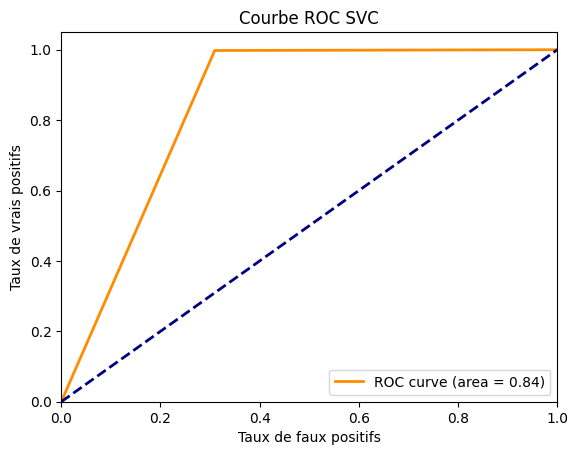

AUC: 0.844222136442696


In [41]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC SVC')
plt.legend(loc="lower right")
plt.show()

# AUC
print(f'AUC: {roc_auc}')

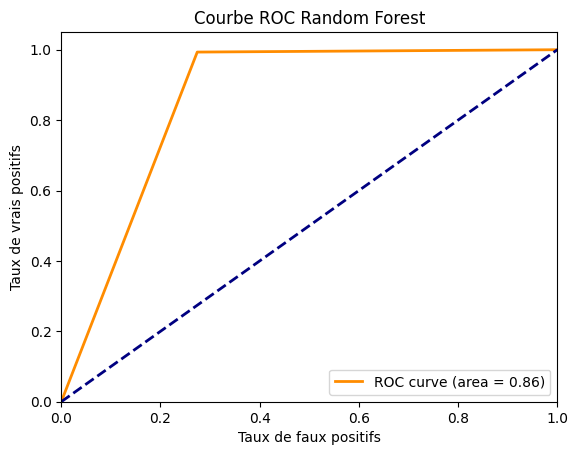

AUC: 0.8595894862511652


In [42]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC Random Forest')
plt.legend(loc="lower right")
plt.show()

# AUC
print(f'AUC: {roc_auc}')

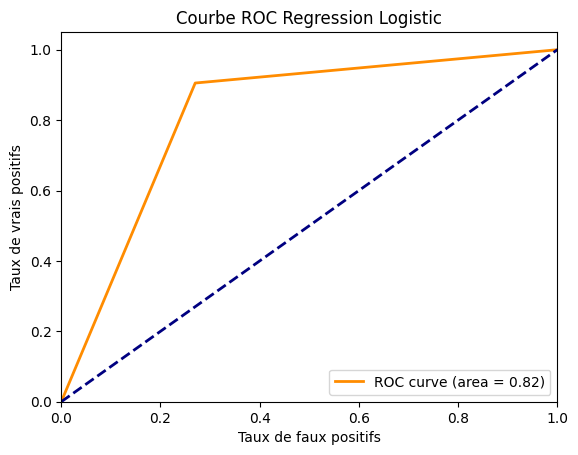

AUC: 0.8176568380944516


In [43]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_log_reg)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC Regression Logistic')
plt.legend(loc="lower right")
plt.show()

# AUC
print(f'AUC: {roc_auc}')

# Entrainement du modele et Validation croisée

In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

# Définition du modèle SVM
model = SVC()

# Grille d'hyperparamètres pour le SVM
param_grid = {
    'C': [0.1, 1, 10],           # Coefficient de régularisation
    'gamma': ['scale', 0.01, 0.1],  # Coefficient du noyau RBF
    'kernel': ['rbf']            # Limité au noyau RBF pour réduire le temps
}

# Recherche aléatoire des hyperparamètres
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=10,                    # Nombre d'échantillons aléatoires
    cv=3,                         # Validation croisée sur 3 plis
    scoring='accuracy',           # Métrique utilisée pour l'évaluation
    n_jobs=-1,                    # Utilise tous les cœurs disponibles
    random_state=42               # Pour la reproductibilité
)

# Entraînement de la recherche sur les données
random_search.fit(X_reduced, y_train)

# Affichage des meilleurs hyperparamètres et du score
print("Meilleurs hyperparamètres :", random_search.best_params_)
print("Meilleur score de validation croisée :", random_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Meilleurs hyperparamètres : {'kernel': 'rbf', 'gamma': 0.1, 'C': 10}
Meilleur score de validation croisée : 0.9628333333333333


# Sauvegarder le best model

In [44]:
import joblib # Pour stocker le modèle
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']